# Practical Machine Learning With Python - Part 2

<p style="font-family:verdana; font-size:15px">In the <a href="https://savan77.github.io/blog/machine-learning-part1.html"> previous post</a>, I explained what is machine learning, types of machine learning, linear regression, logistic regression, various issues that we need to consider such as overfitting and at last I explained what really learning is in machine learning. In <a href="https://savan77.github.io/blog/lab-machine-learning-part1.html">lab session</a>, I explained how to implement algorithms and concepts that I explained in theory session using Python. Check out <a href="https://github.com/savan77/Practical-Machine-Learning-With-Python/">Github repository</a> of this series.</p>
<p style="font-family:verdana; font-size:15px;">
In this session, I will explain some easy yet powerful machine learning algorithms such as <b> naive bayes, support vector machine and decision trees</b>. From now onwards, I will not make seperate part for theory and lab session. Instead, I will integrate theory with code in jupyter notebook. If you are unfamiliar with Jupyter notebooks, please go through <a href="http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Notebook%20Basics.html"> Jupyter Notebook Basics Guide </a>.</p>
<h3 style="font-family:verdana; margin-left:30px">Index</a></h3>
<ul>
<a href="#naive"><li> <p style="font-family:verdana; font-size:15px">
Naive Bayes </p></li></a>
<a href="#svm"><li><p style="font-family:verdana; font-size:15px">
 Support Vector Machines</p></li></a>
 <a href="#dt"><li><p style="font-family:verdana; font-size:15px">
 Decision Tree</p></li></a>
 <a href="#ensemble"><li><p style="font-family:verdana; font-size:15px">
 Ensemble Methods</p></li></a>
 <a href="#ex"><li><p style="font-family:verdana; font-size:15px">
 Exercise</p></li></a>
</ul></p>

## Naive Bayes

<p style="font-family:verdana; font-size:15px" id="naive"><b> Naive Bayes </b> is a supervised learning algorithm which is based on <a href="https://en.wikipedia.org/wiki/Bayes%27_theorem"><b> bayes theorem </b></a>. Naive Bayes is a widely used classification algorithm. Here, word <b> naive</b> comes from the assumption of independence among features. That is, if we have a feature vector (input vector) (x<sub>1</sub>, x<sub>2</sub>,...,x<sub>n</sub>), x<sub>i</sub><sup>'</sup>s are conditionally independent given <i>y</i>. We can write bayes theorem as follows :<br><br>


\begin{align}
P( y | x ) = \frac{P(y)P(x | y)}{P(x)}
\end{align}

where,<br><br>
P(x) is the prior probability of a feature.<br>
P(x | y) is the probability of a feature given target. It's also known as likelihood.<br>
P(y) is the prior probability of a target or class in case of classification.<br>
p(y | x) is the posterior probability of target given feature.<br>
<br>
when we have more than one feature then we can rewrite this equation as :<br><br>

\begin{align}
P( y | x_1,...,x_n) = \frac{P(y)P(x_1,...,x_n | y)}{P(x_1,...,x_n)}
\end{align}
</p>

<p style="font-family:verdana; font-size:15px">Consider an example for spam classification, our input or feature vector will be a set of words and output will be spam or ham (1 or 0). In naive bayes, we calculate probability of each class(spam or ham) given feature vector and class with maximum probability becomes our output. Our task is to solve above equation for each class. Now, let us dig deeper into this equation and see how we can use this equation to find the probability of each class.<br>
Using the naive bayes assumption we can write :<br><br>
\begin{align}
P(x_i | y, x_1,..,x_{i-1},x{i+1},..,x_n) = P(x_i | y)
\end{align}

We can rewrite bayes theorem as follows : 
<br><br>
\begin{align}
P( y | x_1,...,x_n) = \frac{P(y)\prod_{i=1}^{n}P(x_i| y)}{P(x_1,...,x_n)}
\end{align}<br><br>

but we know that <b> P(x<sub>1</sub>, x<sub>2</sub>, .., x<sub>n</sub>)</b> is constant given the input. So we can say that
<br><br>

\begin{align}
P(y|x_1,...,x_n) \propto P(y) \prod_{i=1}^{n} P(x_i|y)\end{align}
<br>
For classification rule (where we want to find the class with maximum probability), we can write equation as :
<br><br>
\begin{align}
\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i|y)
\end{align}
<br>
Now, we can use <a href="https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation"> Maximum a Posteriori</a> estimation to estimate both P(y) and P(x<sub>i</sub>|y). Here, P(y) = samples with class y / total number of sample, in other words, frequency of class y in training data. <br><br>

We can make several variants of naive bayes by using different distribution for P(x<sub>i</sub>|y). Widely used Naive Bayes variants are <a href="https://en.wikipedia.org/wiki/Normal_distribution"> Gaussian Naive Bayes </a>, <a href="https://en.wikipedia.org/wiki/Multinomial_distribution"> Multinomial Naive Bayes </a> and <a href="https://en.wikipedia.org/wiki/Bernoulli_distribution"> Bernoulli Naive Bayes </a>.

Now, we will implement Naive Bayes algorithm in scikit-learn.</p>

In [1]:
#we will use iris dataset
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import numpy as np

#load the dataset
data = load_iris()

model = GaussianNB()
model.fit(data.data, data.target)

#evalaute
print(model.score(data.data, data.target))

#predict
print(model.predict([4.2, 3, 0.9, 2.1])) #0 = setosa,1 = versicolor, and 2 = virginica

0.96
[1]


C:\Users\savan77\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Support Vector Machines

<p style="font-family:verdana; font-size:15px" id="svm"><b> Support Vector Machines</b> are supervised learning models which can be used for both classification and regression. SVMs are among the best supervised learning algorithms. It is effective in high dimensional space and it is memory efficient as well.

Consider a binary classification problem, where the task is to assign a one of the two labels to given input. We plot each data item as a point in n-dimensional space as follows:</p>

![title](../images/svm1.png)

<p style="font-family:verdana; font-size:15px">We can perform classification by finding the hyperplane that differentiate the two classes very well. As you can see in the above image, we can draw m number of hyperplanes. How do we find the best one? We can find the optimal hyperplane by maximizing the <b> margin </b>.</p>
![title](../images/svm2.png)

<p style="font-family:verdana; font-size:15px">We define margin as a twice of the distance between the hyperplane and the nearest sample points to the hyperplane. This points are known as <b>support vector</b>. They known as support vectors because they hold up optimal hyperplane. In above figure, support vectors are represented with filled color.

Consider a first hyperplane in figure-1 which touches the two sample points(red). Although it classifies all the examples correctly, but the problem is our hyperplane is close to the so many sample points and other red examples might fall on the other side of the hyperplane. This problem can be solved by choosing a hyperplane which is farthest away from the sample points. It turns out that this type of model generalize very well. This optimal hyperplane is also known as <b> maximum margin separator</b>.</p>

<p style="font-family:verdana; font-size:15px">We know that we want hyperplane with maximum margin and we also discussed why we want this. Now, let us learn how to find this optimal hyperplane? Before that, please note in case of SVMs, we represent class labels with +1 and -1 instead of 0 and 1(Binary Valued Labels). Here, we represent each hyperplane, the optimal one, negative and positive hyperplane(dashed lines) with linear equations - w<sup>T</sup>x + b = 0, w<sup>T</sup>x+b = -1 and w<sup>T</sup>x + b = +1 respectively. The left most dashed line is negative hyperplane. We represent red points with x<sub>-</sub> and blue points with x<sub>+</sub>. To derive the equation for a margin let us substract equations of negative and positive hyperplane from each other.</p>

<p style="font-family:verdana; font-size:15px">\begin{align}
w^T(x_+ - x_-) = 2
\end{align}<br><br>

Adding length of the vector w to normalize this,<br>

\begin{align}
\frac{w^T(x_+ - x_-)}{||w||} = \frac{2}{||w||} 
\end{align}
<br><br>
where, <b> 2/||w||</b> is the margin.

Now the objective of the SVM becomes maximization of the margin under the constraint that samples are classified correctly.
\begin{align}
w^T x^{(i)} + b >= 1  \hspace{1cm} if \hspace{1cm} y^{(i)} = +1 \newline
w^T x^{(i)} + b < -1  \hspace{1cm} if \hspace{1cm} y^{(i)} = -1
\end{align}
<br><br>
This can also be written more compractly as 
\begin{align}
y^{(i)} ( w_0 + w^T x^{(i)}) >= 1 \forall_i
\end{align}</p>

<p style="font-family:verdana; font-size:15px">In practice, it is easier to minimize the below given reciprocal term \begin{align} \frac{1}{2} ||w||^2 \end{align}. This is the quadratic programming problem with the linear constraint.</p>

<p style="font-family:verdana; font-size:15px">In the case of inherently noisy data, we may not want a linear hyperplane in high-dimensional space. Rather, we'd like a decision surface in low dimensional space that does not clearly seperate the classes, but reflects the reality of the noisy data. That is possible with the <b> soft margin classifier</b>, which allows examples to fall on the wrong side of the decision boundary, but assigns them a penalty proportional to the distance required to move them back on the correct side. In soft margin classifier, we add slack variables to the linear constraint.<br><br>
\begin{align}
y_{(i)} (w^T x_i + b ) >= 1 - \xi \hspace{1cm} for \hspace{1cm} i = 1,..,N
\end{align}

Now, our objective to minimize is<br><br>
\begin{align}
\frac{1}{2} ||w||^2 + C (\sum_{i} \xi^{(i)})
\end{align}

C is the <b> regularization </b> parameter. Small C allows constraint to be easily ignored and results in large margin whereas large C makes constraints hard to ignore and results in narrow margin. This is still a quadratic optimization problem and there is a unique minimum. 

Now let us implement linear SVM classifier in Python using sklearn. We will use iris dataset</p>

In [2]:
#import the dependencies
from sklearn.datasets import load_iris
from sklearn.svm import SVC
#load dataset
dataset = load_iris()
data = dataset.data
target = dataset.target

    In machine learning, we always need to do some preprocessing to make our dataset suitable for the learning algorithm. I will introduce few preprocessing techniques as we go through various algorithms. Here, we will perform feature scaling which is required for optimal performance. Feature scaling is used to standardize the range of features of data.

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(data) #check out preprocessing module of sklearn to learn more about preprocessing in ML

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [4]:
#now let us divide data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.3)

In [5]:
#train a model
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
accuracy_score(y_test, model.predict(X_test))

1.0

In [8]:
model.support_vectors_.shape

(39, 4)

In [9]:
model.support_vectors_

array([[ 5.1,  3.8,  1.9,  0.4],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5.5,  4.2,  1.4,  0.2],
       [ 4.5,  2.3,  1.3,  0.3],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.6,  3. ,  4.5,  1.5],
       [ 5. ,  2. ,  3.5,  1. ],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 6.7,  3. ,  5. ,  1.7],
       [ 5.9,  3.2,  4.8,  1.8],
       [ 5.1,  2.5,  3. ,  1.1],
       [ 6. ,  2.7,  5.1,  1.6],
       [ 6.3,  2.5,  4.9,  1.5],
       [ 6.1,  2.9,  4.7,  1.4],
       [ 6.5,  2.8,  4.6,  1.5],
       [ 7. ,  3.2,  4.7,  1.4],
       [ 6.1,  3. ,  4.6,  1.4],
       [ 5.5,  2.6,  4.4,  1.2],
       [ 4.9,  2.4,  3.3,  1. ],
       [ 6.9,  3.1,  4.9,  1.5],
       [ 6.3,  2.3,  4.4,  1.3],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 7.7,  2.8,  6.7,  2. ],
       [ 6.3,  2.7,  4.9,  1.8],
       [ 7.7,  3.8,  6.7,  2.2],
       [ 5.7,  2.5,  5. ,  2. ],
       [ 6. ,  3. ,  4.8,  1.8],
       [ 5.8,  2.7,  5.1,  1.9],
       [ 6.2,  3.4,  5.4,  2.3],
       [ 6.1,  2.6,  5.6,  1.4],
       [ 6

<p style="font-family:verdana; font-size:15px">Till now, we see problems where input data can be seperated by linear hyperplane. But what is data points are not linearly seperable as shown below?</p>
![title](../images/svm5.png)


<p style="font-family:verdana; font-size:15px">To solve this type of problems where data can not be seperated linearly, we add new feature. For example, let us add new feature z = x<sup>2</sup> + y<sup>2</sup>. Now, if we plot data points on x and z axis we get :</p>
![title](../images/svm3.png)


<p style="font-family:verdana; font-size:15px"> As you can see, now we can have a linear hyperplane that can seperate data points very well. Do we need to add this additional feature manually? And the answer is no. We use the technique called <b> Kernel Trick</b>. Kernel trick is nothing but a set of functions which takes low-dimensional input space and transform it into high-dimensional space where data points are linearly seperable. These functions are called kernels. Widely used kernels are Radial Basis Function Kernel, Polynomial Kernel, Sigmoid kernel, etc.<br><br>

Let us implement this in sklearn.</p>

In [10]:
#we have already imported libs and dataset
model2= SVC(kernel="rbf", gamma=0.2)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

1.0

<p style="font-family:verdana; font-size:15px"> We can have different decision boundary for different kernels and gamma values. Here is the screenshot from scikit-learn website.</p>
![title](../images/svm6.png)


# Decision Tree

<p style="font-family:verdana; font-size:15px" id="dt">Decision Tree is the supervised learning algorithm which can be used for classification as well as regression problems. Decision Tree is very popular learning algorithm because of its interpretability. In this method, we split population into set of homogeneous sets by asking set of questions. Consider a problem where we want to decide what to do on a particular day. We can design a decision tree as follows : (Source: Python Machine Learning by Sebastian Raschka)</p>
![title](../images/dt1.png)

<p style="font-family:verdana; font-size:15px">There are two types of nodes in above figure. One with gray background and one with white background. Nodes with gray background color are terminal nodes. Each edge represents a decision, for i.e, weather is sunny or not?. In above figure, we have four possible classes and each terminal node represents one of them. In above example, features are - work(yes/no), weather(i.e sunny), friends busy?(yes/no). Once we have a decision tree(we haven't seen how to construct them yet) we can predict the outcome. For example, if our input is work(no),weather(rainy),freinds busy?(no) then we will opt for <b> Go to movies</b>.<br><br>

But, how do we construct decision tree? We start with root node and split dataset on a feature that results in largest <b>information gain</b>. We repeat this process of splitting on child node unitl we get nodes which are pure means they contain samples of a once class. We need a way to compute the impurity at each node. Before going into that let us first define information gain. Here, our objective is to maximize the information gain at each split. We define information gain as follows : 
<br><br>
\begin{align}
IG(D_p,f) = I(D_p) - \sum_{j=1}^{m} \frac{N_j}{N_p} I(D_j)
\end{align}

Here, f is the feature to perform the split, D<sub>p</sub> and D<sub>j</sub> are the dataset of the parent and jth child node, I is the impurity measure (i.e entropy, gini index), N<sub>p</sub> is the total number of smples at the parent node and N<sub>j</sub> is the number of samples in the jth child node. Information gain is the difference between the impurity of parent node and the sum of the child node impurities. However, for simplicity and to reduce the combinatorial search space, most machine learning libraries implement binary decision tree, that is, each parent node has two child nodes. Say two child nodes are, D<sub>left</sub> and D<sub>right</sub> then information gain will be:
<br><br>
\begin{align}
IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p} I(D_{right})
\end{align}
<Br><br>
Commonly used impurity measures or splitting criteria are <b> Gini Impurity </b>, <b> Entropy </b> and <b> Classification Error</b>. Here, we'll only discuss about entropy.

For all non-empty classes (p(i | t) not equals to zero), entropy can be defined as <br>
<br><br>
\begin{align}
I_H(t) = -\sum_{i=1}^{C}  p(i | t)  log_2 p(i | t)
\end{align}
<br><br>
Where p(i | t) is the part of the samples that belong to the class i for a particular node t and C is the number of classes. The entropy is 0 if all samples at a node belong to the same class and the entropy is maximum if the classes are distributed uniformly. For example, if we have 100 samples and 2 classes then entropy will be maximum if 50 samples belong to one class and remaining belong to second class.</p>


In [11]:
#entropy in numpy
import numpy as np
def entropy(p):
    return -p * np.log2(p) - (1-p) * np.log2((1-p)) #for binary class

![title](../images/entropy.png)
<p style="font-family:verdana; font-size:15px">
As you can see, entropy is maximum when p(i=1 | t ) and p(i=0 | t)=0.5. And entropy is minimum when all the samples belong to the same class. We define Gini Impurity as :
<br><BR>
\begin{align}
I_g(t) = \sum_{i=1}^{C} p(i | t) (1 - p(i | t))
\end{align}<br><Br>
Now let us implement Decision Tree in sklearn.</p>

In [12]:
#import libs and dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dataset = load_iris()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
#decision trees are prone to overfitting thats why we remove some sub-nodes of the tree, that's called "pruning"
#here, we control depth of the tree using max_depth attribute
#other option for criterion is "gini"
#random_state- just to make sure we get same results each time we run this code

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [13]:
#test the model
model.score(X_test, y_test)

0.97777777777777775

<p style="font-family:verdana; font-size:15px">
We can also save the decision tree which our model has built. You need to have <a href="http://www.graphviz.org/Download.php">Graph Viz </a> and <a href="https://pypi.python.org/pypi/pydotplus">pydotplus</a> installed in your system.</p>

In [14]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO() 
export_graphviz(model, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf") 

True

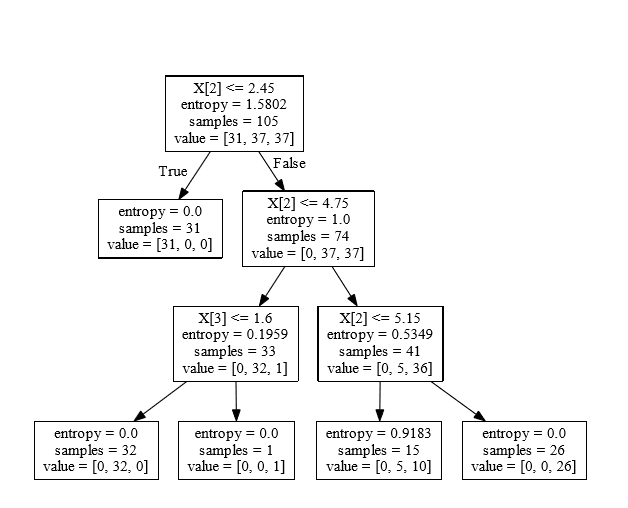

In [15]:
from IPython.display import Image
Image(filename="../images/tree.png")

<p style="font-family:verdana; font-size:15px">
Some of the advantages of Decision Trees are they are easy to understand because of their interpretability, less data cleaning is required, it can handle both numerical and categorical data. One of the problem with decision tree is overfitting which can be solved by pruning the decision tree.

# Ensemble Methods

<p style="font-family:verdana; font-size:15px" id="ensemble">
Till now, we discussed methods in which there was only one hypothesis. In other words, we were training only one model for one problem. In ensemble learning, we train a set of models to achieve better accuracy and stability. At prediction time we combine the prediction of all. In case of classification, we take vote of each model and in case of regression, we take the mean of the prediction of each model. We run multiple models on the data and use the aggregate prediction, which is better than a single model.<br><br></p>
<p style="font-family:verdana; font-size:15px">
<b> Bagging (Bootstrap aggregating)</b> is a technique used to reduce the variance of a prediction by combining the result of multiple classifiers. In baggin, first we create multiple datasets from the original dataset. Please note, these datasets have random number of samples and random number of features. Then we build classifier on each dataset. For prediction, we use combine predictions of models.<br><br>


# Random Forest

<b>Random Forest</b> is the most common type of Ensemble Learning. Basically, it is a collection of decision trees. We repeatedly select data from the data set with replacement (which is also known as <b> bootstrapping</b>)and build a Decision Tree with each new sample. One thing to note here is that each node of the Decision Tree is limited to only considering splits on random subsets of the features. If features were not chosen randomly, Decision Trees in our forest could become highly correlated. There are plethora of advantages of random forest such as they are fast to train, requires no input preparation. One of the disadvantage of random forest is that our model may become too large.<br><br>

</p>
<p style="font-family:verdana; font-size:15px">
We hold out one third of the dataset before generating multiple datasets to use in testing. These samples are called <b> out of bag samples</b> and error estimated with these samples is known as <b> out of bag error</b>.</p>

In [16]:
from sklearn.ensemble import RandomForestClassifier
min_estimator = 30  #min number of trees to be built
max_estimator = 60  #max number of trees to be built
rf = RandomForestClassifier(criterion="entropy", warm_start=True, oob_score=True,random_state=42)
for i in range(min_estimator, max_estimator+1):
    rf.set_params(n_estimators=i)
    rf.fit(X,y)   #do not need to seperate training and testing set
    oob_score = 1 - rf.oob_score_
    print(i, oob_score)

30 0.0333333333333
31 0.0333333333333
32 0.0333333333333
33 0.0333333333333
34 0.0333333333333
35 0.0333333333333
36 0.0333333333333
37 0.04
38 0.04
39 0.04
40 0.04
41 0.0333333333333
42 0.0333333333333
43 0.0333333333333
44 0.04
45 0.0466666666667
46 0.04
47 0.0333333333333
48 0.04
49 0.04
50 0.04
51 0.04
52 0.0333333333333
53 0.0333333333333
54 0.0466666666667
55 0.0466666666667
56 0.04
57 0.04
58 0.04
59 0.04
60 0.04


In [17]:
#rf.score(X,rf.predict(X)) 

1.0

#  Boosting

<p style="font-family:verdana; font-size:15px">
<b>Boosting </b> is a technique used to reduce bias as well as variance in supervised learning. Bias means how much on an average are the predicted values different from the actual value and variance means how different will the predictions of the model be at the same point if different samples are taken from the same population. Boosting refers to a set of machine learning algorithms which convert <b>weak learners</b> into <b>strong learner</b>. This was inspired by a question- Can a set of weak learners create a single strong learner? Gradient Boosting, AdaBoost and XGBoost are examples of boosting algorithms. Boosting algorithms such as xgboost are the secret to win machine learning competitions. Here, I'm not going deeper into boosting algorithms. But they are important. See <a hef="http://mccormickml.com/2013/12/13/adaboost-tutorial/">here</a>, <a href="http://math.mit.edu/~rothvoss/18.304.3PM/Presentations/1-Eric-Boosting304FinalRpdf.pdf">here</a> for AdaBoost and see <a href="http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf">here</a>, <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/">here</a> for Gradient Boosting. See <a href="http://xgboost.readthedocs.io/en/latest/model.html">here</a> for XGBoost</p>.

# AdaBoost in sklearn

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#load the dataset
dataset = load_iris()

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=42, test_size=0.33)
#optioanl - Standardize inputs using StandardScaler
#instantiate a model
model = AdaBoostClassifier(n_estimators=150, random_state=42)
#train a model
model.fit(X_train, y_train)  

print("accuracy: ", model.score(X_test, y_test))

accuracy:  0.9


# Gradient Boosting in sklearn

In [31]:
#we use most of the algorithms for classification algorithm, for this lets go for regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

#load the dataset
dataset = load_boston()

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=42, test_size=0.33)
#optioanl - Standardize inputs using StandardScaler
#instantiate a model
model = GradientBoostingRegressor(n_estimators=500,learning_rate=0.01, random_state=42)
#train a model
model.fit(X_train, y_train)  
from sklearn.metrics import mean_squared_error
print("Mean squared error: ", mean_squared_error(y_test, model.predict(X_test)))

Mean squared error:  8.85292814297


# Exercise

<p style="font-family:verdana; font-size:15px" id="ex">
In <a href="Sentiment%20Analysis.ipynb">this</a> exercise, we will implement a sentiment analysis model which can detect the sentiment from a text. We will also go through some feature extraction techniques and learn how to use textual data in machine learning models.